In [1]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as pd
from sklearn.preprocessing import StandardScaler

warnings.simplefilter("ignore")
mnist = fetch_openml("mnist_784")

In [2]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(mnist.target.shape)
print(mnist.data.shape)

(70000,)
(70000, 784)


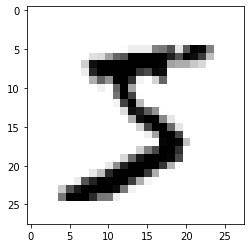

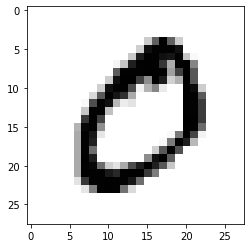

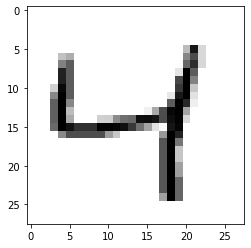

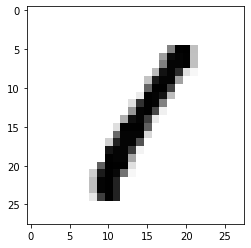

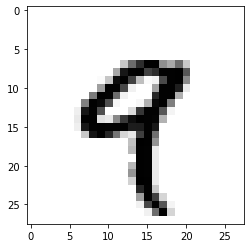

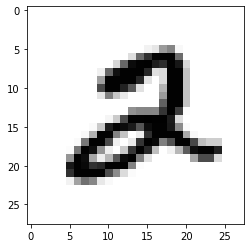

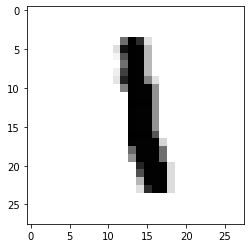

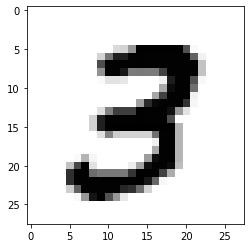

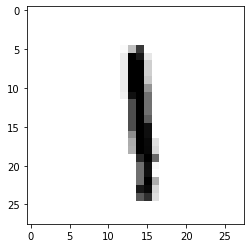

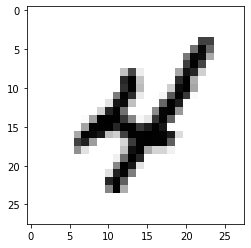

In [4]:
import matplotlib.pyplot as plt

lotImage = mnist.data.to_numpy()

for i in range(10):
    plt.imshow((lotImage[i].reshape(28,28)), cmap=plt.cm.gray_r)
    plt.show()
    

In [5]:
import time 
from sklearn.metrics import accuracy_score

X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = mnist.target[:60000]
y_test = mnist.target[60000:]

print("X_train : ", len(X_train), " y_train : ", len(y_train))
print("X_test : ", len(X_test), " y_test : ", len(y_test))

X_train :  60000  y_train :  60000
X_test :  10000  y_test :  10000


In [6]:
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9656
--- 161.75504803657532 seconds ---


In [30]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.975
--- 49.234519720077515 seconds ---


In [34]:
parametres = {'hidden_layer_sizes':[(50,),(50,50),(50,50,50)],
             'activation':["identity","logistic","tanh","relu"],
             'solver':["lbfgs","sgd","adam"],
             'alpha':[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
             'learning_rate':["constant","invscaling","adaptive"]}

mlp_clf = MLPClassifier()
gridS_mlp = GridSearchCV(mlp_clf, parametres, cv=3, n_jobs=4)
gridS_mlp.fit(X_train_scaler, y_train)

KeyboardInterrupt: 

In [18]:
print(gridS_mlp.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [22]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (50, 50), activation="relu", solver="adam",alpha =0.1 ,learning_rate = "adaptive")
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.975
--- 80.16264581680298 seconds ---


In [28]:
MaximumScore = 0

for i in range(0,20):

    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (50, 50), activation="relu", solver="adam",alpha =0.1 ,learning_rate = "adaptive")
    mlp.fit(X_train_scaler, y_train)
    prediction = mlp.predict(X_test_scaler)
    
    if MaximumScore < accuracy_score(y_test, prediction):
        MaximumScore = accuracy_score(y_test, prediction)
        tempsExec = time.time() - start_time
        print(accuracy_score(y_test, prediction))
        print("--- %s seconds ---" % (time.time() - start_time))
    
    
    

0.9733
--- 66.92190551757812 seconds ---
0.9736
--- 54.65928030014038 seconds ---
0.977
--- 83.78791618347168 seconds ---


In [32]:
MaximumScore = 0

for i in range(0,10):

    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (100, 100), activation="relu", solver="adam",alpha =0.1 ,learning_rate = "adaptive")
    mlp.fit(X_train_scaler, y_train)
    prediction = mlp.predict(X_test_scaler)
    
    if MaximumScore < accuracy_score(y_test, prediction):
        MaximumScore = accuracy_score(y_test, prediction)
        tempsExec = time.time() - start_time
        print(accuracy_score(y_test, prediction))
        print("--- %s seconds ---" % (time.time() - start_time))
    
    
    

0.9764
--- 118.79019117355347 seconds ---
0.9779
--- 109.41379451751709 seconds ---
0.9788
--- 94.53426766395569 seconds ---
0.9795
--- 137.07823491096497 seconds ---
